In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
application_record= '/Users/sravan/Downloads/DIC Homework/project/Phase 1/50600415_50592562_50605005_50594384/src/application_record.csv'
application_df= pd.read_csv(application_record)
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit_record = '/Users/sravan/Downloads/DIC Homework/project/Phase 1/50600415_50592562_50605005_50594384/src/credit_record.csv'
credit_df = pd.read_csv(credit_record)
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
print(application_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
print(credit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


In [7]:
# Data Cleaning - Converting the negative values in DAYS_BIRTH and DAYS_EMPLOYED to meaningful insights

In [8]:
# Convert 'DAYS_BIRTH' to age in years (negative values represent days before today)
application_df['AGE'] = application_df['DAYS_BIRTH'] // -365

# Convert 'DAYS_EMPLOYED' to years (handle anomalies if DAYS_EMPLOYED is negative)
application_df['YEARS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].apply(lambda x: x // -365 if x < 0 else 0)

# Check the updated columns
print(application_df[['AGE', 'YEARS_EMPLOYED']].head())


   AGE  YEARS_EMPLOYED
0   32              12
1   32              12
2   58               3
3   52               8
4   52               8


In [9]:
# DAYS_BIRTH: This column likely represents the age of the customer in terms of how many days before today they were born. Since the birth date is in the past, the values are negative.

# For example, DAYS_BIRTH = -12005 means the customer was born 12,005 days ago.
# To convert it into years: AGE = DAYS_BIRTH / -365.
# DAYS_EMPLOYED: This column represents how many days the customer has been employed, again measured as the number of days before today (hence the negative values). A negative value means the customer has been employed for that many days.

# For example, DAYS_EMPLOYED = -4542 means the customer has been employed for 4,542 days.
# To convert it into years: YEARS_EMPLOYED = DAYS_EMPLOYED / -365.

In [10]:
application_df # we have added a new columns.

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,62,0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,43,8
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,59,0


In [11]:
# checking for duplicates.

In [12]:
duplicate_rows = credit_df.duplicated()
duplicate_rows_2 = application_df.duplicated()

print(f"Number of duplicate rows in Credit df: {duplicate_rows.sum()}")
print(f"Number of duplicate rows in application df: {duplicate_rows_2.sum()}")

Number of duplicate rows in Credit df: 0
Number of duplicate rows in application df: 0


In [13]:
# Checking for Null values/Missing values

In [14]:
print("\nMissing values in application data:")
print(application_df.isnull().sum())


Missing values in application data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
AGE                         0
YEARS_EMPLOYED              0
dtype: int64


In [15]:
print("\nMissing values in credit data:")
print(credit_df.isnull().sum())


Missing values in credit data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [16]:
 # As we are checking for credict card approvals if will be important for us not to remove these values so considered that we are keeping the missing values as Unknown occuation as its related to occuation.

In [17]:
# Replace NaN values in 'OCCUPATION_TYPE' with 'Unknown' in the same column
application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

# Verify that there are no missing values in the 'OCCUPATION_TYPE' column
print(application_df['OCCUPATION_TYPE'].isnull().sum())

# Check for missing values in the entire DataFrame after handling 'OCCUPATION_TYPE'
print(application_df.isnull().sum())

0
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
dtype: int64


In [18]:
# combining the datasets

In [19]:
# Drop duplicates based on 'ID' in the application data, keeping the first occurrence
application_df = application_df.drop_duplicates(subset='ID', keep='first')

# Calculate the mode of 'STATUS' for each 'ID' in the credit data, ignoring 'X' because it about ppl not having loan
mode_status = credit_df.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0]).reset_index()
mode_status.rename(columns={'STATUS': 'mode_status'}, inplace=True)
mode_status = mode_status[mode_status['mode_status'] != 'X']  # Remove rows with mode 'X'

# Merge the application data with the mode_status data from credit records on 'ID'
merged_df = pd.merge(application_df, mode_status, on='ID', how='inner')

# Display the first few rows of the merged DataFrame to ensure everything is correct
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,mode_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,32,12,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,32,12,C
2,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,C
3,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,C
4,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,Unknown,1.0,61,0,0


In [20]:
print(merged_df.isnull().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
mode_status            0
dtype: int64


In [21]:
duplicate_rows = merged_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [22]:
# Now i want to change the target variable into a binary format

In [23]:
status_map = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    'C': 1
}

def label_status(status):
    return status_map.get(status, -1)  # Use -1 as a default for unknown status

In [24]:
merged_df['label'] = merged_df['mode_status'].apply(label_status)
merged_df['label'].value_counts()


label
0    17652
1    12807
Name: count, dtype: int64

In [25]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,mode_status,label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,32,12,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,32,12,C,1
2,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,8,C,1
3,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,8,C,1
4,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,1,0,0,0,Unknown,1.0,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30454,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,1,0,Laborers,2.0,44,25,C,1
30455,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33,3,1,0
30456,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,0,1,1,Medicine staff,2.0,33,3,C,1
30457,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Sales staff,2.0,49,1,0,0


In [26]:
merged_df = merged_df.applymap(lambda s: s.upper().strip() if type(s) == str else s)

In [27]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,mode_status,label
0,5008804,M,Y,Y,0,427500.0,WORKING,HIGHER EDUCATION,CIVIL MARRIAGE,RENTED APARTMENT,...,1,1,0,0,UNKNOWN,2.0,32,12,C,1
1,5008805,M,Y,Y,0,427500.0,WORKING,HIGHER EDUCATION,CIVIL MARRIAGE,RENTED APARTMENT,...,1,1,0,0,UNKNOWN,2.0,32,12,C,1
2,5008810,F,N,Y,0,270000.0,COMMERCIAL ASSOCIATE,SECONDARY / SECONDARY SPECIAL,SINGLE / NOT MARRIED,HOUSE / APARTMENT,...,1,0,1,1,SALES STAFF,1.0,52,8,C,1
3,5008811,F,N,Y,0,270000.0,COMMERCIAL ASSOCIATE,SECONDARY / SECONDARY SPECIAL,SINGLE / NOT MARRIED,HOUSE / APARTMENT,...,1,0,1,1,SALES STAFF,1.0,52,8,C,1
4,5008812,F,N,Y,0,283500.0,PENSIONER,HIGHER EDUCATION,SEPARATED,HOUSE / APARTMENT,...,1,0,0,0,UNKNOWN,1.0,61,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30454,5149775,F,Y,Y,0,130500.0,WORKING,SECONDARY / SECONDARY SPECIAL,MARRIED,HOUSE / APARTMENT,...,1,0,1,0,LABORERS,2.0,44,25,C,1
30455,5149834,F,N,Y,0,157500.0,COMMERCIAL ASSOCIATE,HIGHER EDUCATION,MARRIED,HOUSE / APARTMENT,...,1,0,1,1,MEDICINE STAFF,2.0,33,3,1,0
30456,5149838,F,N,Y,0,157500.0,PENSIONER,HIGHER EDUCATION,MARRIED,HOUSE / APARTMENT,...,1,0,1,1,MEDICINE STAFF,2.0,33,3,C,1
30457,5150049,F,N,Y,0,283500.0,WORKING,SECONDARY / SECONDARY SPECIAL,MARRIED,HOUSE / APARTMENT,...,1,0,0,0,SALES STAFF,2.0,49,1,0,0


In [28]:
merged_df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True) # We are dropping because we already have converted them into Age and years_employed

In [29]:
merged_df.drop(columns=['mode_status'], inplace=True) # because we did binary classifcation and got label

In [30]:
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,label
0,5008804,M,Y,Y,0,427500.0,WORKING,HIGHER EDUCATION,CIVIL MARRIAGE,RENTED APARTMENT,1,1,0,0,UNKNOWN,2.0,32,12,1
1,5008805,M,Y,Y,0,427500.0,WORKING,HIGHER EDUCATION,CIVIL MARRIAGE,RENTED APARTMENT,1,1,0,0,UNKNOWN,2.0,32,12,1
2,5008810,F,N,Y,0,270000.0,COMMERCIAL ASSOCIATE,SECONDARY / SECONDARY SPECIAL,SINGLE / NOT MARRIED,HOUSE / APARTMENT,1,0,1,1,SALES STAFF,1.0,52,8,1
3,5008811,F,N,Y,0,270000.0,COMMERCIAL ASSOCIATE,SECONDARY / SECONDARY SPECIAL,SINGLE / NOT MARRIED,HOUSE / APARTMENT,1,0,1,1,SALES STAFF,1.0,52,8,1
4,5008812,F,N,Y,0,283500.0,PENSIONER,HIGHER EDUCATION,SEPARATED,HOUSE / APARTMENT,1,0,0,0,UNKNOWN,1.0,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30454,5149775,F,Y,Y,0,130500.0,WORKING,SECONDARY / SECONDARY SPECIAL,MARRIED,HOUSE / APARTMENT,1,0,1,0,LABORERS,2.0,44,25,1
30455,5149834,F,N,Y,0,157500.0,COMMERCIAL ASSOCIATE,HIGHER EDUCATION,MARRIED,HOUSE / APARTMENT,1,0,1,1,MEDICINE STAFF,2.0,33,3,0
30456,5149838,F,N,Y,0,157500.0,PENSIONER,HIGHER EDUCATION,MARRIED,HOUSE / APARTMENT,1,0,1,1,MEDICINE STAFF,2.0,33,3,1
30457,5150049,F,N,Y,0,283500.0,WORKING,SECONDARY / SECONDARY SPECIAL,MARRIED,HOUSE / APARTMENT,1,0,0,0,SALES STAFF,2.0,49,1,0


In [31]:
# Plotting income against age to identify if any outliers are present

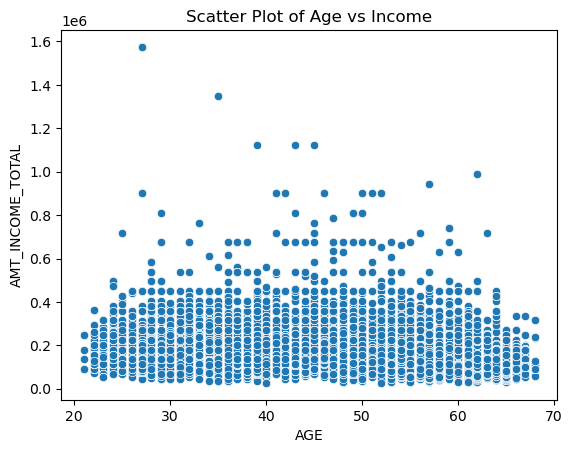

In [32]:
sns.scatterplot(x='AGE', y='AMT_INCOME_TOTAL', data=merged_df)
plt.title('Scatter Plot of Age vs Income')
plt.show()


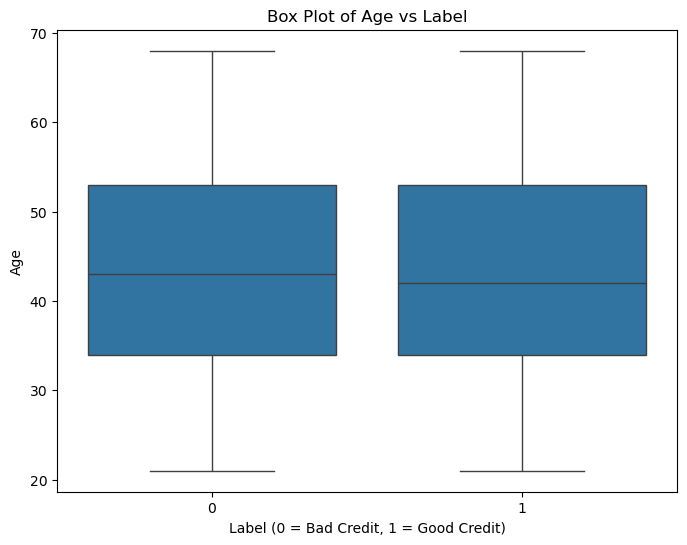

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='AGE', data=merged_df)
plt.title('Box Plot of Age vs Label')
plt.xlabel('Label (0 = Bad Credit, 1 = Good Credit)')
plt.ylabel('Age')
plt.show()


In [34]:
Q1 = merged_df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = merged_df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to get outliers
outliers = merged_df[(merged_df['AMT_INCOME_TOTAL'] < lower_bound) | (merged_df['AMT_INCOME_TOTAL'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 1252


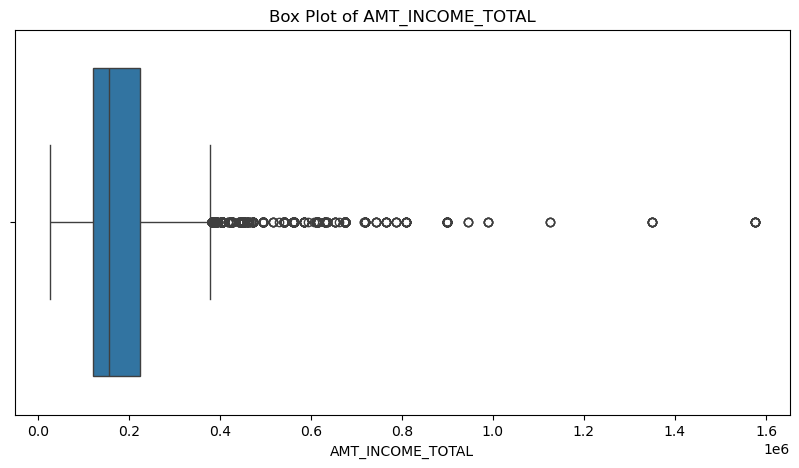

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df['AMT_INCOME_TOTAL'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()

In [36]:
# Having outliers so we wont remove those intead we will use bins
bins = [0, 100000, 300000, 500000, merged_df['AMT_INCOME_TOTAL'].max()]
labels = ['Low', 'Medium', 'High', 'Extremely High']

# Re-bin the income data into 4 categories
merged_df['INCOME_CATEGORY'] = pd.cut(merged_df['AMT_INCOME_TOTAL'], bins=bins, labels=labels)


# Check the distribution after binning
print(merged_df['INCOME_CATEGORY'].value_counts())

INCOME_CATEGORY
Medium            22995
Low                4336
High               2749
Extremely High      379
Name: count, dtype: int64


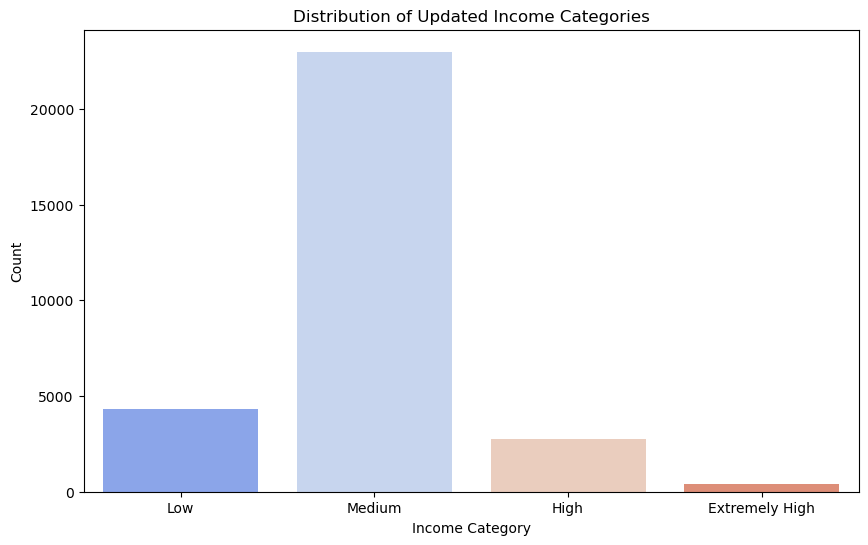

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='INCOME_CATEGORY', data=merged_df, palette="coolwarm")
plt.title('Distribution of Updated Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

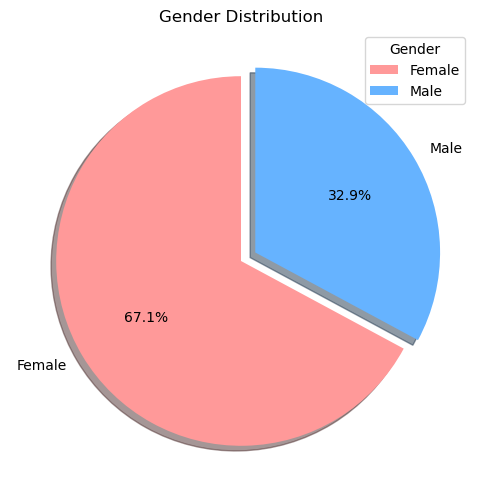

In [38]:
plt.figure(figsize=(6,6))
colors = ['#ff9999', '#66b3ff']  
explode = (0, 0.09)  

plt.pie(x=application_df['CODE_GENDER'].value_counts().values, 
        labels=['Female', 'Male'], 
        autopct='%.1f%%', startangle=90, explode=explode, 
        colors=colors, shadow=True)

plt.legend(title="Gender", loc="upper right")  
plt.title("Gender Distribution")  
plt.show()

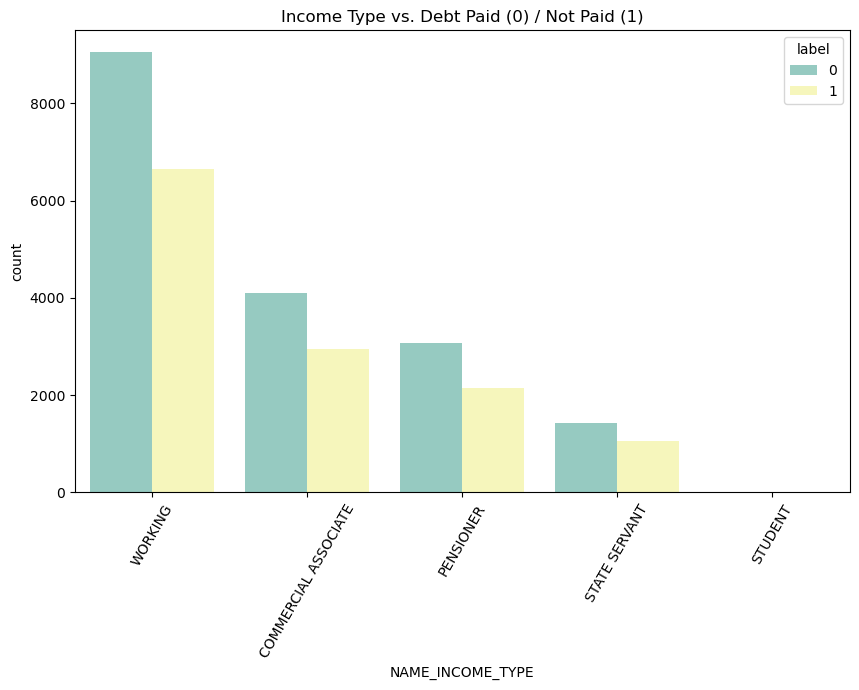

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_INCOME_TYPE', hue='label', data=merged_df, palette="Set3")
plt.title('Income Type vs. Debt Paid (0) / Not Paid (1)')
plt.xticks(rotation=60)
plt.show()


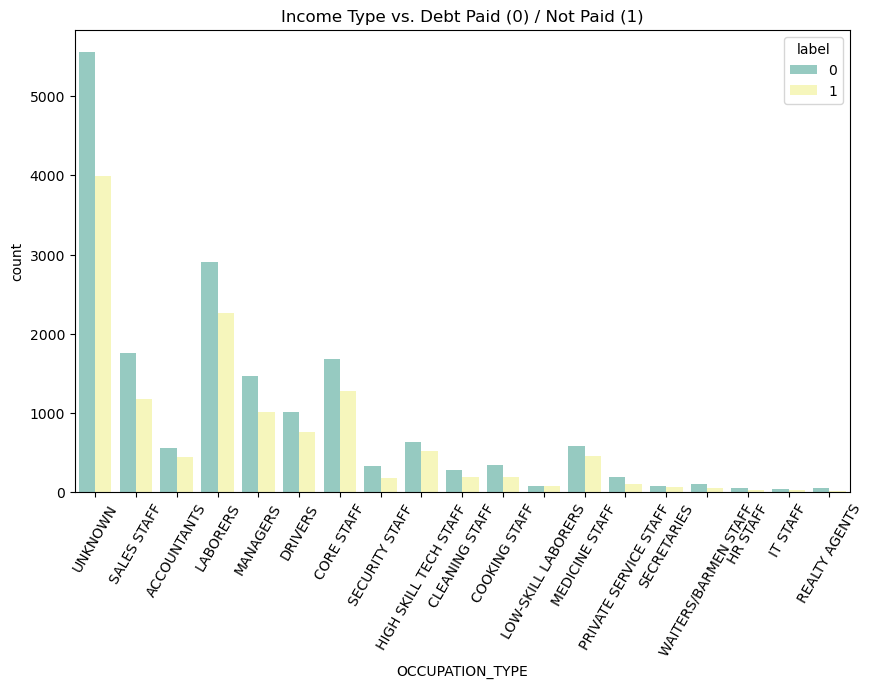

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='label', data=merged_df, palette="Set3")
plt.title('Income Type vs. Debt Paid (0) / Not Paid (1)')
plt.xticks(rotation=60)
plt.show()

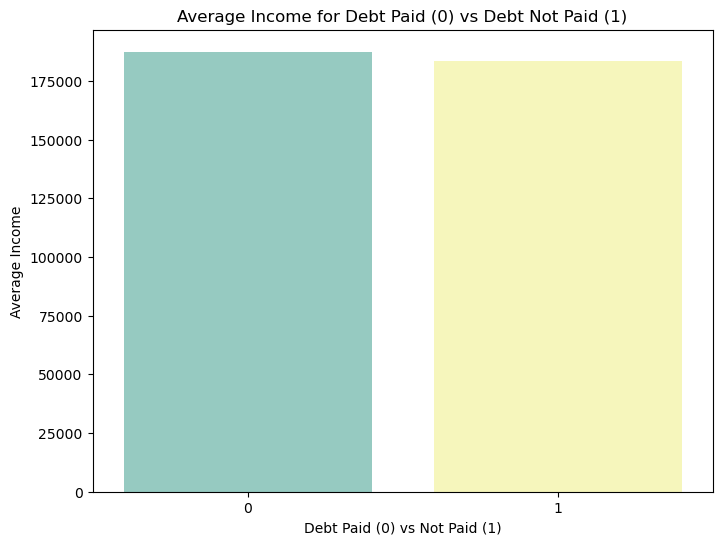

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='AMT_INCOME_TOTAL', data=merged_df, ci=None, palette="Set3")

# Add title and labels
plt.title('Average Income for Debt Paid (0) vs Debt Not Paid (1)')
plt.xlabel('Debt Paid (0) vs Not Paid (1)')
plt.ylabel('Average Income')
plt.show()


In [42]:
# Group by income type and label to count occurrences
income_label_counts = merged_df.groupby(['NAME_INCOME_TYPE', 'label']).size().reset_index(name='count')

# Calculate the total number of people in each income category
total_counts = merged_df.groupby(['NAME_INCOME_TYPE']).size().reset_index(name='total')

# Merge the two dataframes to calculate proportions
income_label_counts = income_label_counts.merge(total_counts, on='NAME_INCOME_TYPE')

# Calculate the proportion of people who paid (label=0) and didn't pay (label=1)
income_label_counts['proportion'] = income_label_counts['count'] / income_label_counts['total']

# Display the calculated data
print(income_label_counts)


       NAME_INCOME_TYPE  label  count  total  proportion
0  COMMERCIAL ASSOCIATE      0   4103   7050    0.581986
1  COMMERCIAL ASSOCIATE      1   2947   7050    0.418014
2             PENSIONER      0   3065   5204    0.588970
3             PENSIONER      1   2139   5204    0.411030
4         STATE SERVANT      0   1426   2486    0.573612
5         STATE SERVANT      1   1060   2486    0.426388
6               STUDENT      0      3     10    0.300000
7               STUDENT      1      7     10    0.700000
8               WORKING      0   9055  15709    0.576421
9               WORKING      1   6654  15709    0.423579


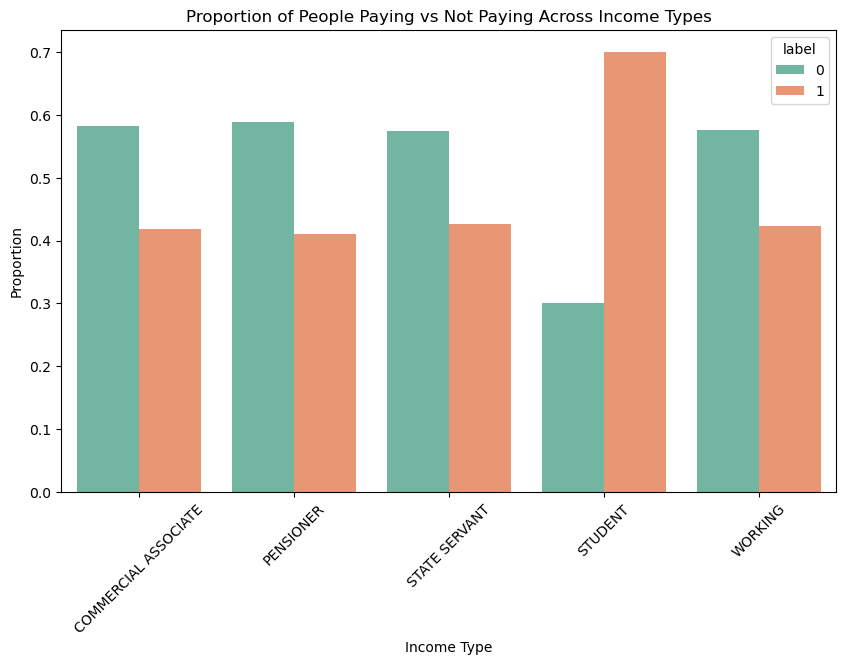

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='proportion', hue='label', data=income_label_counts, palette="Set2")

# Add title and labels
plt.title('Proportion of People Paying vs Not Paying Across Income Types')
plt.xlabel('Income Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Group by family status, housing type, and label to count occurrences
family_housing_counts = merged_df.groupby(['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'label']).size().reset_index(name='count')

# Calculate the total number of people in each family and housing category
total_family_housing_counts = merged_df.groupby(['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']).size().reset_index(name='total')

# Merge the two dataframes to calculate proportions
family_housing_counts = family_housing_counts.merge(total_family_housing_counts, on=['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

# Calculate the proportion of people who paid (label=0) and didn't pay (label=1)
family_housing_counts['proportion'] = family_housing_counts['count'] / family_housing_counts['total']

# Display the data
print(family_housing_counts)


      NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  label  count  total  proportion
0         CIVIL MARRIAGE    HOUSE / APARTMENT      0   1267   2193    0.577747
1         CIVIL MARRIAGE    HOUSE / APARTMENT      1    926   2193    0.422253
2         CIVIL MARRIAGE  MUNICIPAL APARTMENT      0     13     34    0.382353
3         CIVIL MARRIAGE  MUNICIPAL APARTMENT      1     21     34    0.617647
4         CIVIL MARRIAGE     OFFICE APARTMENT      0     22     36    0.611111
5         CIVIL MARRIAGE     OFFICE APARTMENT      1     14     36    0.388889
6         CIVIL MARRIAGE     RENTED APARTMENT      0     29     35    0.828571
7         CIVIL MARRIAGE     RENTED APARTMENT      1      6     35    0.171429
8         CIVIL MARRIAGE         WITH PARENTS      0     93    154    0.603896
9         CIVIL MARRIAGE         WITH PARENTS      1     61    154    0.396104
10               MARRIED      CO-OP APARTMENT      0     41     78    0.525641
11               MARRIED      CO-OP APARTMENT      1

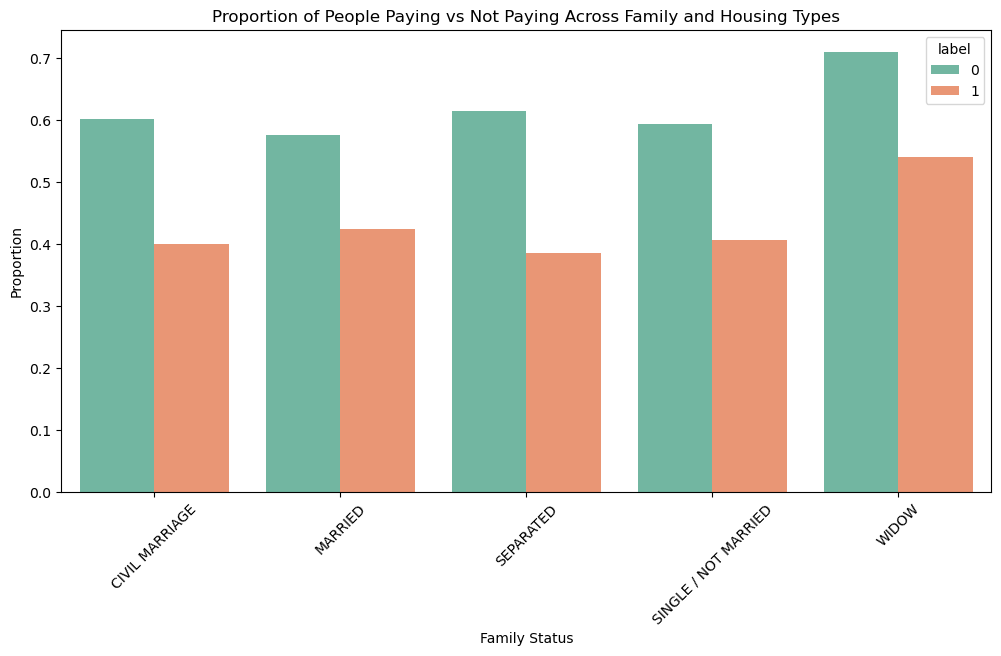

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_FAMILY_STATUS', y='proportion', hue='label', data=family_housing_counts, palette="Set2", ci=None)

# Add title and labels
plt.title('Proportion of People Paying vs Not Paying Across Family and Housing Types')
plt.xlabel('Family Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

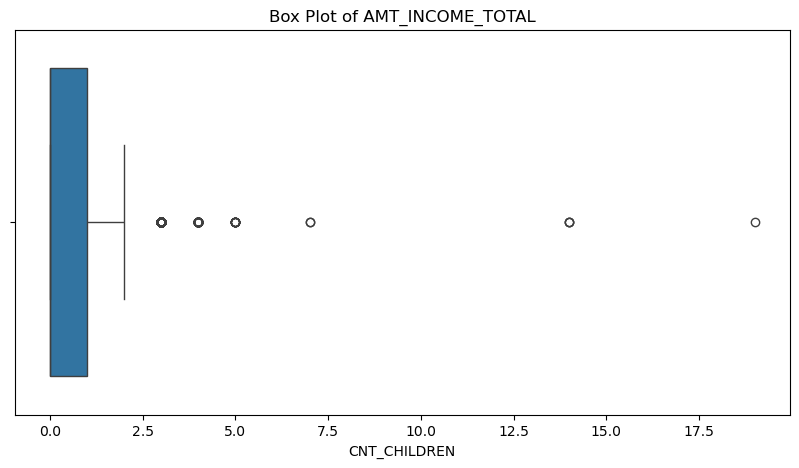

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=merged_df['CNT_CHILDREN'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()

In [47]:
# Create bins for the number of children
bins = [0, 1, 2, 3, 4, 5, float('inf')]  # Define the bin edges
labels = ['0', '1', '2', '3', '4', '5+']  # Labels for the bins

# Create a new column 'children_binned' to categorize based on the bins
merged_df['children_binned'] = pd.cut(merged_df['CNT_CHILDREN'], bins=bins, labels=labels, right=False)

# Group by the binned children category and label to count occurrences
children_label_counts_binned = merged_df.groupby(['children_binned', 'label']).size().reset_index(name='count')

# Calculate the total number of people in each binned category
total_children_counts_binned = merged_df.groupby(['children_binned']).size().reset_index(name='total')

# Merge the two dataframes to calculate proportions
children_label_counts_binned = children_label_counts_binned.merge(total_children_counts_binned, on='children_binned')

# Calculate the proportion of people who paid (label=0) and didn't pay (label=1)
children_label_counts_binned['proportion'] = children_label_counts_binned['count'] / children_label_counts_binned['total']

# Display the data
print(children_label_counts_binned)



   children_binned  label  count  total  proportion
0                0      0  12255  21116    0.580366
1                0      1   8861  21116    0.419634
2                1      0   3606   6183    0.583212
3                1      1   2577   6183    0.416788
4                2      0   1551   2743    0.565439
5                2      1   1192   2743    0.434561
6                3      0    203    353    0.575071
7                3      1    150    353    0.424929
8                4      0     28     48    0.583333
9                4      1     20     48    0.416667
10              5+      0      9     16    0.562500
11              5+      1      7     16    0.437500


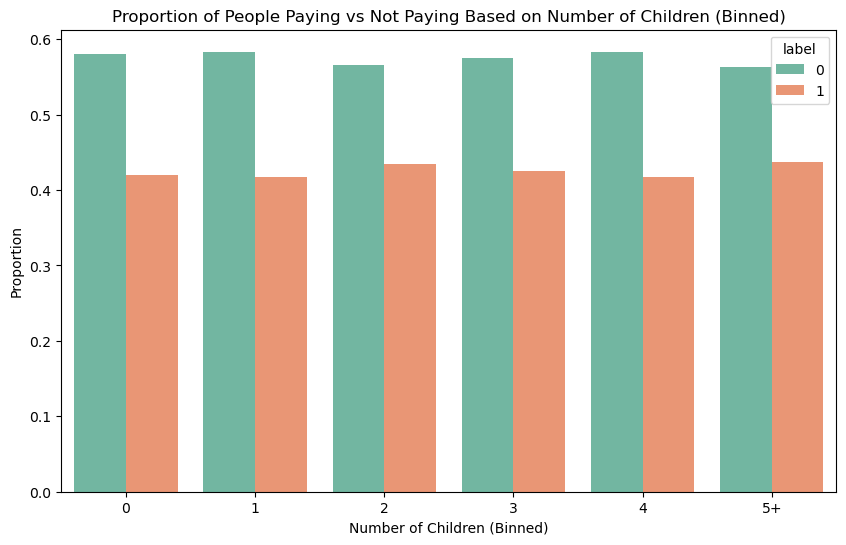

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children_binned', y='proportion', hue='label', data=children_label_counts_binned, palette="Set2")

# Add title and labels
plt.title('Proportion of People Paying vs Not Paying Based on Number of Children (Binned)')
plt.xlabel('Number of Children (Binned)')
plt.ylabel('Proportion')
plt.show()


In [49]:
merged_df.dtypes

ID                        int64
CODE_GENDER              object
FLAG_OWN_CAR             object
FLAG_OWN_REALTY          object
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE         object
NAME_EDUCATION_TYPE      object
NAME_FAMILY_STATUS       object
NAME_HOUSING_TYPE        object
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE          object
CNT_FAM_MEMBERS         float64
AGE                       int64
YEARS_EMPLOYED            int64
label                     int64
INCOME_CATEGORY        category
children_binned        category
dtype: object

In [50]:
merged_df.drop(columns=['FLAG_MOBIL'], inplace=True)

In [51]:
numeric_columns_df = merged_df.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation matrix
correlation_matrix = numeric_columns_df.corr()

# Display the correlation matrix
correlation_matrix

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,label
ID,1.000000,0.025476,-0.010958,0.080291,0.011674,-0.048735,0.021437,-0.049850,-0.009449,0.022708
CNT_CHILDREN,0.025476,1.000000,0.041530,0.055000,-0.015594,0.020992,0.889129,-0.342053,0.036592,0.004030
AMT_INCOME_TOTAL,-0.010958,0.041530,1.000000,-0.033051,0.018194,0.093990,0.028670,-0.072512,0.082459,-0.019482
FLAG_WORK_PHONE,0.080291,0.055000,-0.033051,1.000000,0.315760,-0.033775,0.068503,-0.179485,0.106695,0.013056
FLAG_PHONE,0.011674,-0.015594,0.018194,0.315760,1.000000,0.019248,-0.004401,0.024191,0.041660,-0.006299
FLAG_EMAIL,-0.048735,0.020992,0.093990,-0.033775,0.019248,1.000000,0.020158,-0.105837,-0.002039,0.003147
CNT_FAM_MEMBERS,0.021437,0.889129,0.028670,0.068503,-0.004401,0.020158,1.000000,-0.304139,0.047597,0.007453
AGE,-0.049850,-0.342053,-0.072512,-0.179485,0.024191,-0.105837,-0.304139,1.000000,-0.006317,-0.008042
YEARS_EMPLOYED,-0.009449,0.036592,0.082459,0.106695,0.041660,-0.002039,0.047597,-0.006317,1.000000,0.017583
label,0.022708,0.004030,-0.019482,0.013056,-0.006299,0.003147,0.007453,-0.008042,0.017583,1.000000


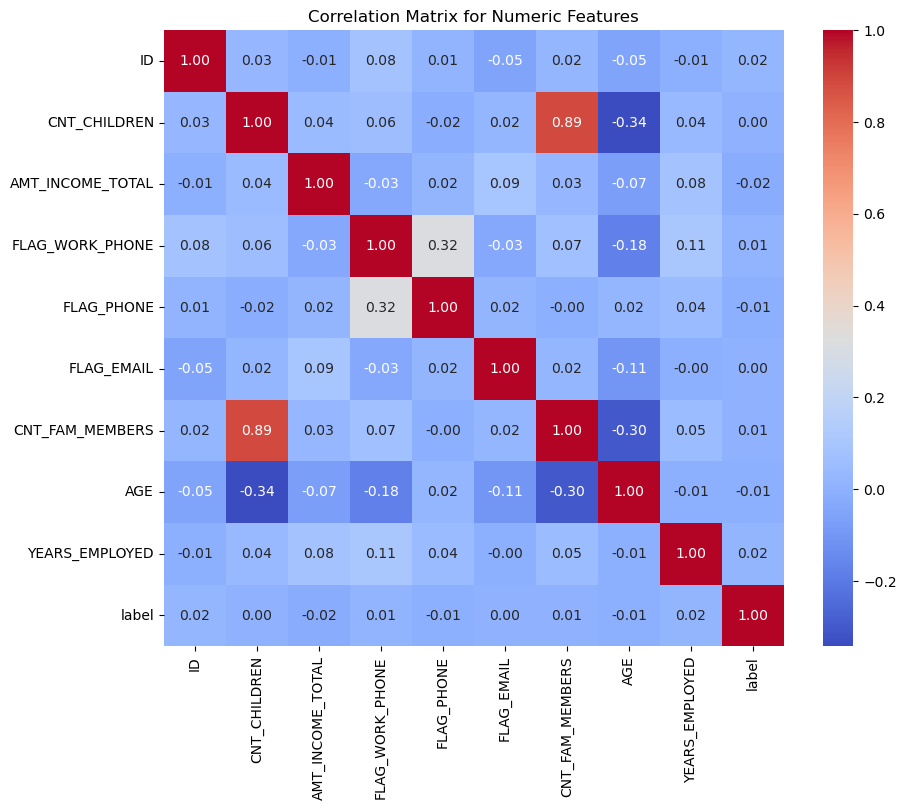

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

In [53]:
numerical_columns_df = merged_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation of numerical features with the 'label' column
correlation_with_label_numerical = numerical_columns_df.corr()['label'].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_label_numerical)

label               1.000000
ID                  0.022708
YEARS_EMPLOYED      0.017583
FLAG_WORK_PHONE     0.013056
CNT_FAM_MEMBERS     0.007453
CNT_CHILDREN        0.004030
FLAG_EMAIL          0.003147
FLAG_PHONE         -0.006299
AGE                -0.008042
AMT_INCOME_TOTAL   -0.019482
Name: label, dtype: float64


In [54]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns with a high percentage of missing values (e.g., >50%)
threshold = 0.5 * len(merged_df)
merged_df = merged_df.loc[:, merged_df.isnull().sum() < threshold]

# Impute missing values for numerical columns with median
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# Impute missing values for categorical columns with mode
categorical_columns = merged_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])


Missing Values:
 ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
AGE                    0
YEARS_EMPLOYED         0
label                  0
INCOME_CATEGORY        0
children_binned        0
dtype: int64


In [55]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical columns
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']  # Update as necessary
label_encoder = LabelEncoder()
for col in categorical_columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

# One-hot encoding for multi-class categorical columns
multi_class_categorical = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']  # Update as needed
merged_df = pd.get_dummies(merged_df, columns=multi_class_categorical, drop_first=True)


In [56]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_columns = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED']  # Update as necessary
scaler = StandardScaler()
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])


In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = merged_df.drop(columns=['label'])  # Ensure 'label' is your target column
y = merged_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [58]:
# Check for object columns in X
object_columns = X.select_dtypes(include=['object']).columns
print("Object columns in the dataset:", object_columns)

# Preview the problematic columns
for col in object_columns:
    print(f"Unique values in {col}:", X[col].unique())



Object columns in the dataset: Index([], dtype='object')


In [59]:
# Check columns with non-numeric or invalid entries
non_numeric_columns = X.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)

# Check for invalid numeric entries (e.g., strings in numeric columns)
for col in X.columns:
    try:
        X[col].astype(float)
    except ValueError:
        print(f"Invalid entries found in column: {col}")
        print(X[col].unique())


Non-numeric columns: Index(['INCOME_CATEGORY', 'children_binned', 'NAME_INCOME_TYPE_PENSIONER',
       'NAME_INCOME_TYPE_STATE SERVANT', 'NAME_INCOME_TYPE_STUDENT',
       'NAME_INCOME_TYPE_WORKING', 'NAME_EDUCATION_TYPE_HIGHER EDUCATION',
       'NAME_EDUCATION_TYPE_INCOMPLETE HIGHER',
       'NAME_EDUCATION_TYPE_LOWER SECONDARY',
       'NAME_EDUCATION_TYPE_SECONDARY / SECONDARY SPECIAL',
       'NAME_FAMILY_STATUS_MARRIED', 'NAME_FAMILY_STATUS_SEPARATED',
       'NAME_FAMILY_STATUS_SINGLE / NOT MARRIED', 'NAME_FAMILY_STATUS_WIDOW',
       'NAME_HOUSING_TYPE_HOUSE / APARTMENT',
       'NAME_HOUSING_TYPE_MUNICIPAL APARTMENT',
       'NAME_HOUSING_TYPE_OFFICE APARTMENT',
       'NAME_HOUSING_TYPE_RENTED APARTMENT', 'NAME_HOUSING_TYPE_WITH PARENTS',
       'OCCUPATION_TYPE_CLEANING STAFF', 'OCCUPATION_TYPE_COOKING STAFF',
       'OCCUPATION_TYPE_CORE STAFF', 'OCCUPATION_TYPE_DRIVERS',
       'OCCUPATION_TYPE_HIGH SKILL TECH STAFF', 'OCCUPATION_TYPE_HR STAFF',
       'OCCUPATION_TYPE_IT 

In [60]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for INCOME_CATEGORY
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Extremely High']])
merged_df['INCOME_CATEGORY'] = ordinal_encoder.fit_transform(merged_df[['INCOME_CATEGORY']])


In [61]:
# Ordinal encoding for children_binned
children_binned_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5+': 5}
merged_df['children_binned'] = merged_df['children_binned'].map(children_binned_mapping)


In [62]:
# List all columns in the DataFrame
print("Columns in merged_df:", merged_df.columns)


Columns in merged_df: Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED', 'label', 'INCOME_CATEGORY',
       'children_binned', 'NAME_INCOME_TYPE_PENSIONER',
       'NAME_INCOME_TYPE_STATE SERVANT', 'NAME_INCOME_TYPE_STUDENT',
       'NAME_INCOME_TYPE_WORKING', 'NAME_EDUCATION_TYPE_HIGHER EDUCATION',
       'NAME_EDUCATION_TYPE_INCOMPLETE HIGHER',
       'NAME_EDUCATION_TYPE_LOWER SECONDARY',
       'NAME_EDUCATION_TYPE_SECONDARY / SECONDARY SPECIAL',
       'NAME_FAMILY_STATUS_MARRIED', 'NAME_FAMILY_STATUS_SEPARATED',
       'NAME_FAMILY_STATUS_SINGLE / NOT MARRIED', 'NAME_FAMILY_STATUS_WIDOW',
       'NAME_HOUSING_TYPE_HOUSE / APARTMENT',
       'NAME_HOUSING_TYPE_MUNICIPAL APARTMENT',
       'NAME_HOUSING_TYPE_OFFICE APARTMENT',
       'NAME_HOUSING_TYPE_RENTED APARTMENT', 'NAME_HOUSING_TYPE_WITH PARENTS',
       'OCCUPATION_TYPE_CLE

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop ID column if not needed
X = merged_df.drop(columns=['label', 'ID'])  # 'label' is assumed to be the target column
y = merged_df['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Logistic Regression Metrics:
Accuracy: 0.5118
Precision: 0.4347
Recall: 0.5367
F1 Score: 0.4804
ROC-AUC: 0.5255


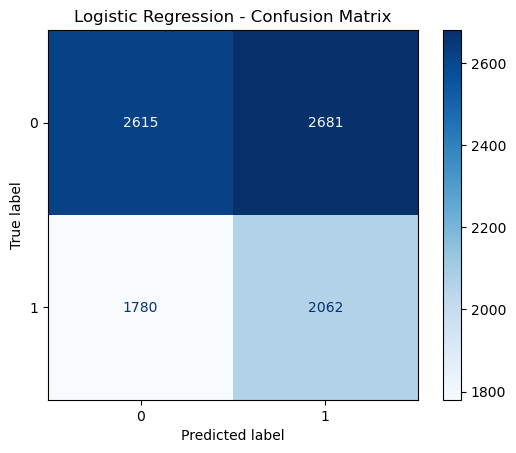

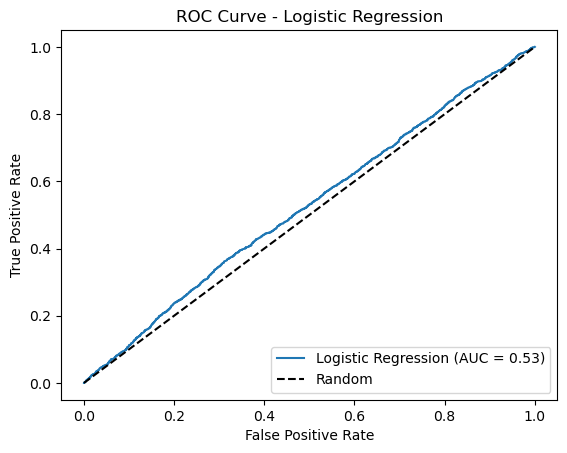

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

Random Forest Metrics:
Accuracy: 0.6626
Precision: 0.5957
Recall: 0.6150
F1 Score: 0.6052
ROC-AUC: 0.7203


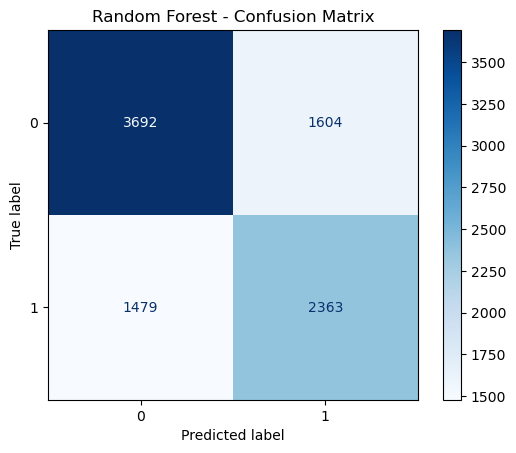

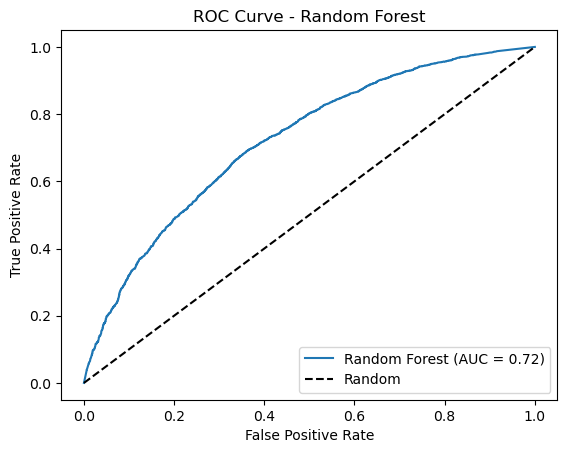

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

Gradient Boosting Metrics:
Accuracy: 0.5888
Precision: 0.5921
Recall: 0.0703
F1 Score: 0.1256
ROC-AUC: 0.5667


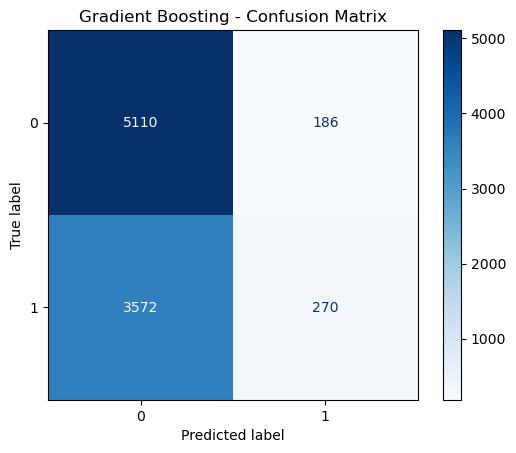

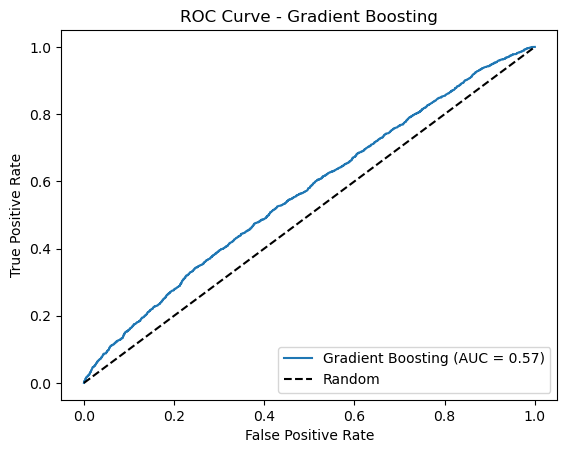

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_prob_gb)

print("Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.show()

SVM Metrics:
Accuracy: 0.5045
Precision: 0.4359
Recall: 0.6070
F1 Score: 0.5074
ROC-AUC: 0.5220


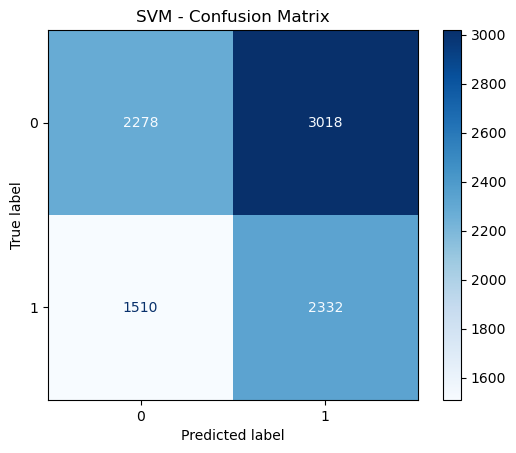

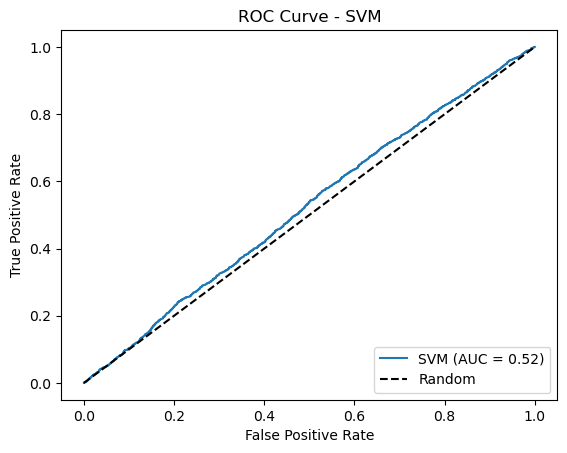

In [67]:
from sklearn.svm import SVC

# SVM with Linear Kernel
svm_model = SVC(kernel="linear", probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_prob_svm)

print("SVM Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("SVM - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.show()

KNN Metrics:
Accuracy: 0.6323
Precision: 0.5671
Recall: 0.5305
F1 Score: 0.5481
ROC-AUC: 0.6657


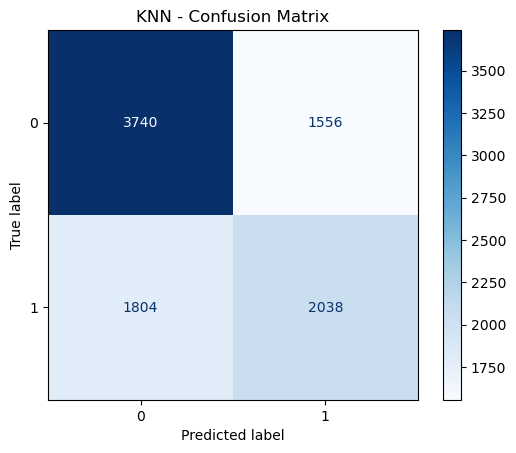

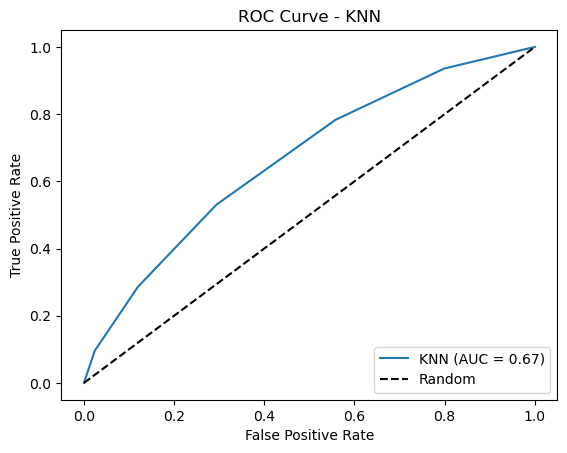

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_prob_knn)

print("KNN Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("KNN - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()